In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("uber.csv")

In [3]:
df.head()

Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         -73.965316         40.803349                3  
4         -73.973082         40.761247                5

In [4]:
df = df.drop(['Unnamed: 0', 'key'], axis = 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        200000 non-null  float64
 1   pickup_datetime    200000 non-null  object 
 2   pickup_longitude   200000 non-null  float64
 3   pickup_latitude    200000 non-null  float64
 4   dropoff_longitude  199999 non-null  float64
 5   dropoff_latitude   199999 non-null  float64
 6   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.7+ MB


In [6]:
df.shape

(200000, 7)

In [7]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [8]:
df.describe()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  200000.000000     200000.000000    200000.000000      199999.000000   
mean       11.359955        -72.527638        39.935885         -72.525292   
std         9.901776         11.437787         7.720539          13.117408   
min       -52.000000      -1340.648410       -74.015515       -3356.666300   
25%         6.000000        -73.992065        40.734796         -73.991407   
50%         8.500000        -73.981823        40.752592         -73.980093   
75%        12.500000        -73.967154        40.767158         -73.963658   
max       499.000000         57.418457      1644.421482        1153.572603   

       dropoff_latitude  passenger_count  
count     199999.000000    200000.000000  
mean          39.923890         1.684535  
std            6.794829         1.385997  
min         -881.985513         0.000000  
25%           40.733823         1.000000  
50%           40.753042         1.000000  
75%           40.768001         2.000000  
max          872.697628       208.000000

In [9]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [10]:
df['fare_amount'].fillna(value=df['fare_amount'].mean(), inplace=True)

In [11]:
df['pickup_longitude'].fillna(value=df['pickup_longitude'].mean(), inplace=True)

In [12]:
df['pickup_latitude'].fillna(value=df['pickup_latitude'].mean(), inplace=True)

In [13]:
df['dropoff_longitude'].fillna(value=df['dropoff_longitude'].mean(), inplace=True)

In [14]:
df['dropoff_latitude'].fillna(value=df['dropoff_latitude'].mean(), inplace=True)

In [15]:
df['passenger_count'].fillna(value=df['passenger_count'].mean(), inplace=True)

In [16]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime, errors='coerce')

In [18]:
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [19]:
df = df.assign(hour = df.pickup_datetime.dt.hour,
               day = df.pickup_datetime.dt.day,
               month = df.pickup_datetime.dt.month,
               year = df.pickup_datetime.dt.year,
               dayofweek = df.pickup_datetime.dt.dayofweek)

In [20]:
df.head()

fare_amount           pickup_datetime  pickup_longitude  pickup_latitude  \
0          7.5 2015-05-07 19:52:06+00:00        -73.999817        40.738354   
1          7.7 2009-07-17 20:04:56+00:00        -73.994355        40.728225   
2         12.9 2009-08-24 21:45:00+00:00        -74.005043        40.740770   
3          5.3 2009-06-26 08:22:21+00:00        -73.976124        40.790844   
4         16.0 2014-08-28 17:47:00+00:00        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  hour  day  month  \
0         -73.999512         40.723217                1    19    7      5   
1         -73.994710         40.750325                1    20   17      7   
2         -73.962565         40.772647                1    21   24      8   
3         -73.965316         40.803349                3     8   26      6   
4         -73.973082         40.761247                5    17   28      8   

   year  dayofweek  
0  2015          3  
1  2009          4  
2  2009          0  
3  2009          4  
4  2014          3

In [21]:
df = df.drop('pickup_datetime', axis = 1)

In [22]:
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.925023        40.744085         -73.973082   

   dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  
0         40.723217                1    19    7      5  2015          3  
1         40.750325                1    20   17      7  2009          4  
2         40.772647                1    21   24      8  2009          0  
3         40.803349                3     8   26      6  2009          4  
4         40.761247                5    17   28      8  2014          3

In [23]:
df.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
hour                   int64
day                    int64
month                  int64
year                   int64
dayofweek              int64
dtype: object

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

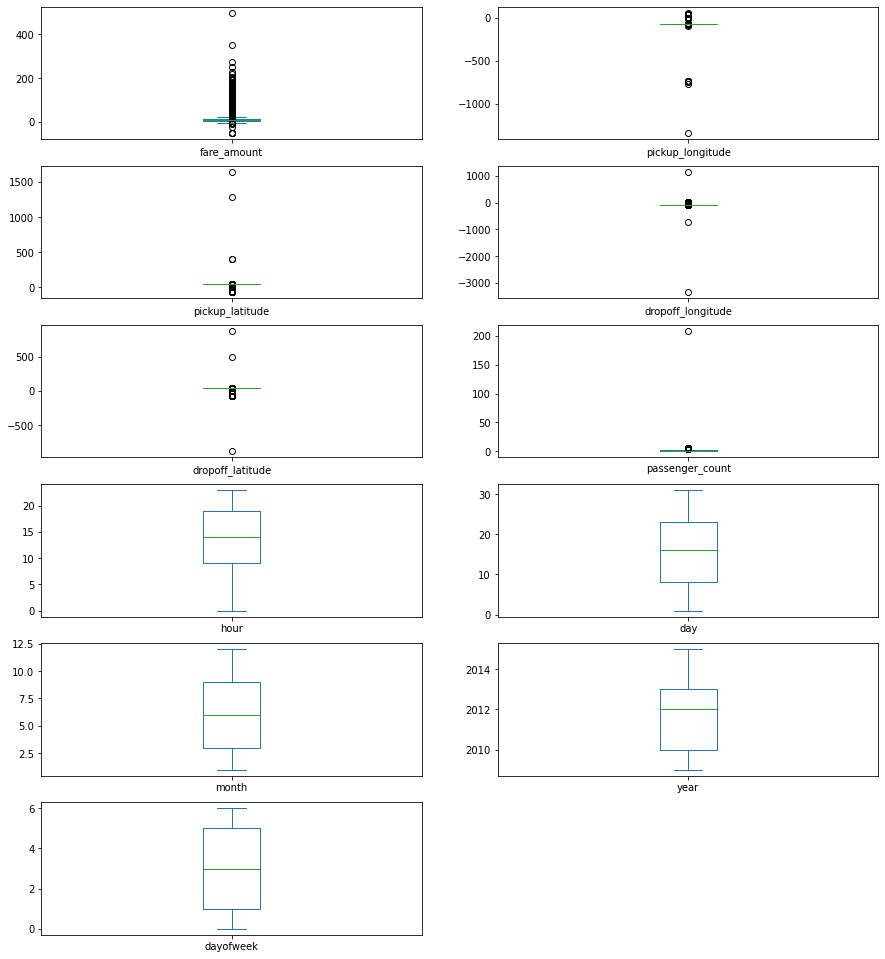

In [24]:
df.plot(kind="box", subplots=True, layout=(7,2), figsize=(15,20))

In [26]:
def remove_outlier(df1, col):
  Q1 = df1[col].quantile(0.25)
  Q3 = df1[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_whisker = Q1 - 1.5*IQR
  upper_whisker = Q3 + 1.5*IQR
  df1[col] = np.clip(df1[col], lower_whisker, upper_whisker)
  return df1

In [27]:
def treat_outliers_all(df1, col_list):
  for c in col_list:
    df1 = remove_outlier(df, c)
  return df1

In [28]:
df = treat_outliers_all(df, df.iloc[: , 0::])

fare_amount             AxesSubplot(0.125,0.787927;0.352273x0.0920732)
pickup_longitude     AxesSubplot(0.547727,0.787927;0.352273x0.0920732)
pickup_latitude         AxesSubplot(0.125,0.677439;0.352273x0.0920732)
dropoff_longitude    AxesSubplot(0.547727,0.677439;0.352273x0.0920732)
dropoff_latitude        AxesSubplot(0.125,0.566951;0.352273x0.0920732)
passenger_count      AxesSubplot(0.547727,0.566951;0.352273x0.0920732)
hour                    AxesSubplot(0.125,0.456463;0.352273x0.0920732)
day                  AxesSubplot(0.547727,0.456463;0.352273x0.0920732)
month                   AxesSubplot(0.125,0.345976;0.352273x0.0920732)
year                 AxesSubplot(0.547727,0.345976;0.352273x0.0920732)
dayofweek               AxesSubplot(0.125,0.235488;0.352273x0.0920732)
dtype: object

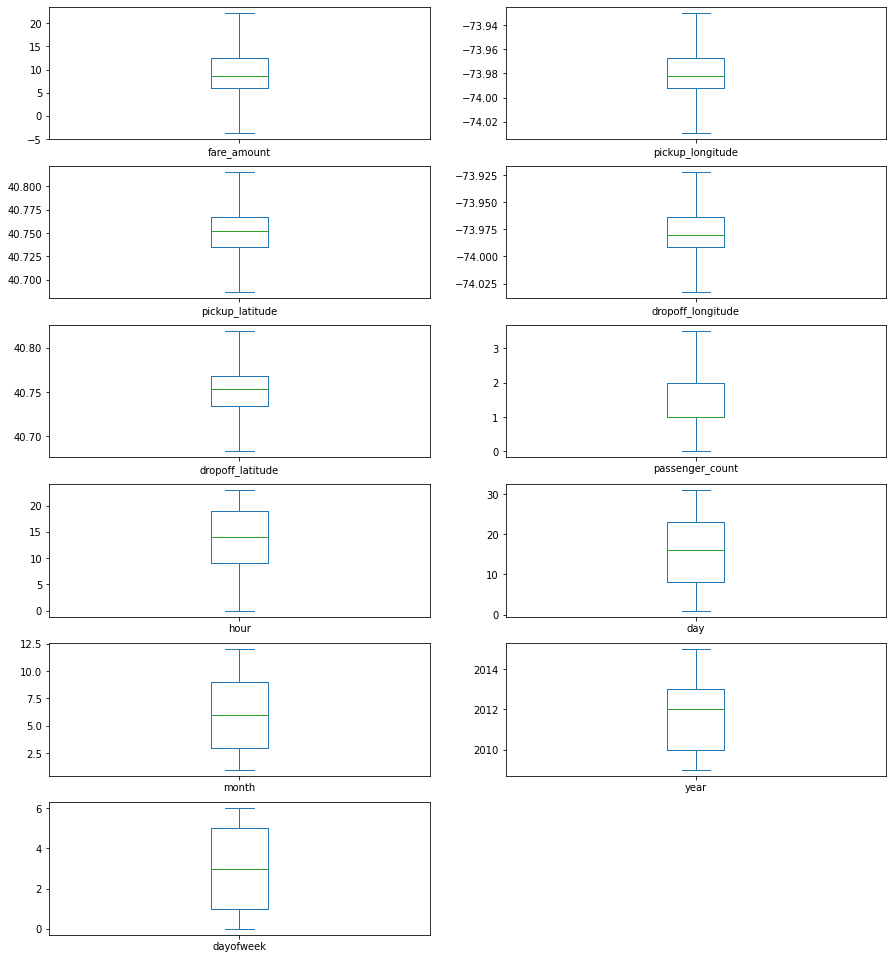

In [29]:
df.plot(kind="box", subplots=True, layout=(7,2), figsize=(15,20))

In [30]:
!pip install haversine


You should consider upgrading via the 'c:\users\vivek dhokane\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [31]:
import haversine as hs
travel_dist = []
for pos in range(len(df['pickup_longitude'])):
  long1, lati1, long2, lati2 = df['pickup_longitude'][pos], df['pickup_latitude'][pos], df['dropoff_longitude'][pos], df['dropoff_latitude'][pos]
  loc1 = (lati1, long1)
  loc2 = (lati2, long2)
  c = hs.haversine(loc1, loc2)
  travel_dist.append(c)


df['dist_travel_km'] = travel_dist
df.head()

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
0          7.5        -73.999817        40.738354         -73.999512   
1          7.7        -73.994355        40.728225         -73.994710   
2         12.9        -74.005043        40.740770         -73.962565   
3          5.3        -73.976124        40.790844         -73.965316   
4         16.0        -73.929786        40.744085         -73.973082   

   dropoff_latitude  passenger_count  hour  day  month  year  dayofweek  \
0         40.723217              1.0    19    7      5  2015          3   
1         40.750325              1.0    20   17      7  2009          4   
2         40.772647              1.0    21   24      8  2009          0   
3         40.803349              3.0     8   26      6  2009          4   
4         40.761247              3.5    17   28      8  2014          3   

   dist_travel_km  
0        1.683325  
1        2.457593  
2        5.036384  
3        1.661686  
4        4.116088

In [32]:
df = df.loc[(df.dist_travel_km >= 1) | (df.dist_travel_km <= 130)]
print("Remaining Observations in the dataset: ", df.shape)

Remaining Observations in the dataset:  (200000, 12)


In [33]:
df.isnull().sum()

fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
hour                 0
day                  0
month                0
year                 0
dayofweek            0
dist_travel_km       0
dtype: int64

<AxesSubplot:>

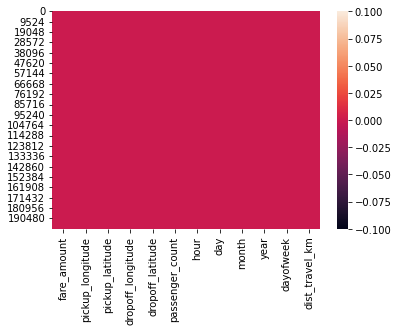

In [34]:
sns.heatmap(df.isnull())

In [35]:
corr = df.corr()

In [36]:
corr

fare_amount  pickup_longitude  pickup_latitude  \
fare_amount           1.000000          0.154069        -0.110842   
pickup_longitude      0.154069          1.000000         0.259497   
pickup_latitude      -0.110842          0.259497         1.000000   
dropoff_longitude     0.218704          0.425631         0.048898   
dropoff_latitude     -0.125898          0.073290         0.515714   
passenger_count       0.015778         -0.013213        -0.012889   
hour                 -0.023623          0.011579         0.029681   
day                   0.004534         -0.003204        -0.001553   
month                 0.030817          0.001169         0.001562   
year                  0.141277          0.010198        -0.014243   
dayofweek             0.013652         -0.024652        -0.042310   
dist_travel_km        0.786388          0.048450        -0.073364   

                   dropoff_longitude  dropoff_latitude  passenger_count  \
fare_amount                 0.218704         -0.125898         0.015778   
pickup_longitude            0.425631          0.073290        -0.013213   
pickup_latitude             0.048898          0.515714        -0.012889   
dropoff_longitude           1.000000          0.245627        -0.009325   
dropoff_latitude            0.245627          1.000000        -0.006308   
passenger_count            -0.009325         -0.006308         1.000000   
hour                       -0.046578          0.019783         0.020274   
day                        -0.004027         -0.003479         0.002712   
month                       0.002394         -0.001193         0.010351   
year                        0.011355         -0.009603        -0.009749   
dayofweek                  -0.003349         -0.031919         0.048550   
dist_travel_km              0.155245         -0.052703         0.009884   

                       hour       day     month      year  dayofweek  \
fare_amount       -0.023623  0.004534  0.030817  0.141277   0.013652   
pickup_longitude   0.011579 -0.003204  0.001169  0.010198  -0.024652   
pickup_latitude    0.029681 -0.001553  0.001562 -0.014243  -0.042310   
dropoff_longitude -0.046578 -0.004027  0.002394  0.011355  -0.003349   
dropoff_latitude   0.019783 -0.003479 -0.001193 -0.009603  -0.031919   
passenger_count    0.020274  0.002712  0.010351 -0.009749   0.048550   
hour               1.000000  0.004677 -0.003926  0.002156  -0.086947   
day                0.004677  1.000000 -0.017360 -0.012170   0.005617   
month             -0.003926 -0.017360  1.000000 -0.115859  -0.008786   
year               0.002156 -0.012170 -0.115859  1.000000   0.006113   
dayofweek         -0.086947  0.005617 -0.008786  0.006113   1.000000   
dist_travel_km    -0.035708  0.001709  0.010050  0.022294   0.030383   

                   dist_travel_km  
fare_amount              0.786388  
pickup_longitude         0.048450  
pickup_latitude         -0.073364  
dropoff_longitude        0.155245  
dropoff_latitude        -0.052703  
passenger_count          0.009884  
hour                    -0.035708  
day                      0.001709  
month                    0.010050  
year                     0.022294  
dayofweek                0.030383  
dist_travel_km           1.000000

<AxesSubplot:>

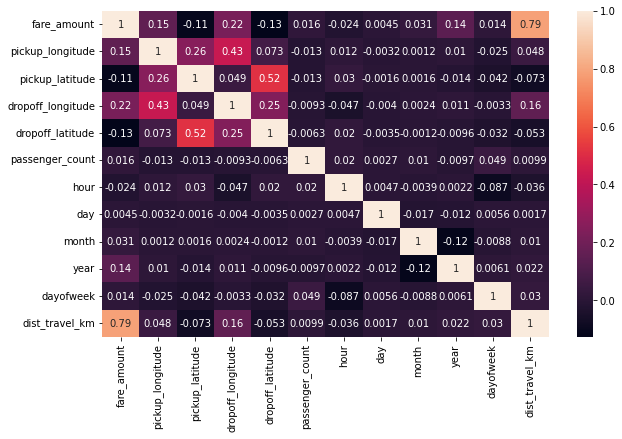

In [37]:
fig, axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(), annot = True)

In [38]:
#Dividing the dataset into training and testing dataset

In [39]:
x = df[['pickup_longitude', 'pickup_longitude', 'dropoff_longitude', 'dropoff_latitude']]
y = df['fare_amount']

In [40]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33)

In [41]:
#Linear Regression 

In [42]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [43]:
regression.fit(x_train, y_train)

LinearRegression()

In [44]:
regression.intercept_

6929.076511712859

In [45]:
regression.coef_

array([-3.30552938e+12,  3.30552938e+12,  5.68832130e+01, -3.55185589e+01])

In [46]:
prediction = regression.predict(x_test)

In [47]:
print(prediction)

[10.29696294  8.65400951  9.5099938  ... 10.22799488  9.70718198
 13.56093257]


In [48]:
y_test

184806     9.7
11078      4.9
90614      4.0
15594     17.7
8476       5.7
          ... 
11547      5.5
88502      7.0
172405    13.3
115533     8.0
43683     16.5
Name: fare_amount, Length: 66000, dtype: float64

In [49]:
#Metrics Evaluation

In [50]:
from sklearn.metrics import r2_score

In [51]:
r2_score(y_test, prediction)

0.08567283843495488

In [52]:
from sklearn.metrics import mean_squared_error


In [53]:
MSE = mean_squared_error(y_test, prediction)

In [54]:
MSE

27.075415679044553

In [55]:
RMSE = np.sqrt(MSE)

In [56]:
RMSE

5.203404239442151

In [57]:
#Random Forest Regression

In [58]:
from sklearn.ensemble import RandomForestRegressor

In [59]:
rf = RandomForestRegressor(n_estimators=100)

In [ ]:
rf.fit(x_train, y_train)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
y_pred

In [ ]:
#Metrics Evalution for Random Forest

In [ ]:
R2_Random = r2_score(y_test, y_pred)

In [ ]:
R2_Random

In [ ]:
MSE_Random = mean_squared_error(y_test, y_pred)

In [ ]:
MSE_Random

In [ ]:
RMSE_Random = np.sqrt(MSE_Random)

In [ ]:
RMSE_Random